In [1]:
#Import Libraries

import pandapower as pp
from pandapower import plotting as pplot
import pandas as pd
import numpy as np

In [2]:
#Basic Setup

model = "balearics_2" #Determines spreadsheet to extract network data from:
#balaerics_1 = existing network, balearics_2 = solar network

peak = 2 #select peak (1 = 13:20, 2 = 21:40)
PF = 0.9 #set Load Power Factor
sbv = 1.0 #Set Slack Bus nominal voltage
net = pp.create_empty_network() #Create empty network within pandapower

In [3]:
#Bus Setup

df_bus = pd.read_excel('{}.xls'.format(model),sheet_name='bus') #Import spreadsheet with bus details

buses = {} #Create dictionary to store buses
for i in range (0 , len(df_bus)): #Loop to create buses according to imported spreadsheet
    #key within 'buses' dictionary set to bus designation from spreadsheet
    buses[df_bus.at[i,'bus']] = pp.create_bus(net , #Assign bus to dictionary + 'net'
        vn_kv = df_bus.at[i , 'vn_kv'] , #Import nominal voltage
        name = df_bus.at[i , 'name'], #Import name
        geodata = (df_bus.at[i , 'lattitude'] , df_bus.at[i , 'longitude'])) #Import geodata

net.bus

,name,vn_kv,type,zone,in_service
0,Elvissa OCGT Power Station,66.0,b,None,True
1,Sant Antoni Substation,66.0,b,None,True
2,Sant Jordi Substation,66.0,b,None,True
3,Santa Eularia Substation,66.0,b,None,True
4,Torrent Substation LV,66.0,b,None,True
5,Torrent Substation HV,132.0,b,None,True
6,Formentera Power Station/Substation,66.0,b,None,True
7,Santa Ponsa Cable Terminal HV,220.0,b,None,True
8,Santa Ponsa Cable Terminal LV,132.0,b,None,True
9,Cala Mesquida Cable Terminal,132.0,b,None,True


In [4]:
#Slack Bus Assignment - Mainland Interconnector

pp.create_ext_grid(net, bus = buses['BMAC01'], vm_pu = sbv, name = 'Slack Bus Interconnector')


0

In [5]:
#Load Assignment

df_load = pd.read_excel('{}.xls'.format(model),sheet_name='load') #Import spreadsheet with load details

for i in range (0 , len(df_load)): #Loop to assign loads to buses according to imported spreadsheet
    pp.create_load(net, bus = buses["{}".format(df_load.at[i , 'bus'])] , #Assign load to bus
        p_mw = df_load.at[i , 'P{}'.format(peak)] , #Import Real Power value according to selected peak (P1 or P2)
        q_mvar = df_load.at[i,'P{}'.format(peak)]*np.tan(np.arccos(PF)) , #calculates Q for given peak and power factor
        name = df_load.at[i, 'name']) #Import name

#Reactor Assignment

df_reactor = pd.read_excel('{}.xls'.format(model),sheet_name='reactor') #Import spreadsheet with reactor details

for i in range (0 , len(df_reactor)): #Loop to assign reators to buses according to imported spreadsheet
    pp.create_load(net, bus = buses["{}".format(df_reactor.at[i , 'bus'])] , #Assign reactor to bus
        p_mw = 0 , #Real Power set to 0
        q_mvar = df_reactor.at[i , 'Q{}'.format(peak)] , #Import Reactive Power value according to selected peak (Q1 or Q2)
        name = df_reactor.at[i, 'name']) #Import name

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,Sant Antoni Load,1,16.4,7.942883,0.0,0.0,NaN,1.0,True,wye
1,Sant Jordi Load,2,18.1,8.766230,0.0,0.0,NaN,1.0,True,wye
2,Santa Eularia Load,3,4.0,1.937288,0.0,0.0,NaN,1.0,True,wye
3,Torrent Load,4,61.5,29.785809,0.0,0.0,NaN,1.0,True,wye
4,Formentera Load,6,9.6,4.649492,0.0,0.0,NaN,1.0,True,wye
5,Es Bessons Substation HV,13,58.9,28.526572,0.0,0.0,NaN,1.0,True,wye
6,Llubi Substaton,15,23.0,11.139408,0.0,0.0,NaN,1.0,True,wye
7,Murterar Substation,16,52.8,25.572207,0.0,0.0,NaN,1.0,True,wye
8,Sant Joan de Deu Substation,17,57.1,27.654792,0.0,0.0,NaN,1.0,True,wye
9,Son Orlandis Substation,18,98.8,47.851024,0.0,0.0,NaN,1.0,True,wye


In [6]:
#Generator Assignment

#Existing Assets

df_gen = pd.read_excel('{}.xls'.format(model),sheet_name='gen') #Import spreadsheet with generator details

for i in range (0 , len(df_gen)): #Loop to assign generators to buses according to imported spreadsheet
        pp.create_sgen(net, bus = buses["{}".format(df_gen.at[i , 'bus'])] , #Assign generator to bus
            p_mw = df_gen.at[i , 'P{}'.format(peak)] , #Import Real Power value according to selected peak (P1 or P2)
            q_mvar = df_gen.at[i , 'Q{}'.format(peak)], #Import Reactive Power value according to selected peak (Q1 or Q2)
            name = df_gen.at[i, 'name']) #Import name
 
#
#proposed solar

df_gen_solar = pd.read_excel('{}.xls'.format(model),sheet_name='gen_solar') #Import spreadsheet with solar generation details

for i in range (0 , len(df_gen_solar)): #Loop to assign 'solar' generators to buses according to imported spreadsheet
        pp.create_sgen(net, bus = buses["{}".format(df_gen_solar.at[i , 'bus'])] , #Assign generator to bus
            p_mw = df_gen_solar.at[i , 'P{}'.format(peak)] , #Import Real Power value according to selected peak (P1 or P2)
            q_mvar = df_gen_solar.at[i , 'Q{}'.format(peak)], #Import Reactive Power value according to selected peak (Q1 or Q2)
            name = df_gen_solar.at[i , 'name']) #Import name

#Proposed Batteries

df_gen_batt = pd.read_excel('{}.xls'.format(model),sheet_name='gen_battery') #Import spreadsheet with battery generation details

for i in range (0 , len(df_gen_batt)): #Loop to assign 'battery' generators to buses according to imported spreadsheet
        pp.create_sgen(net, bus = buses["{}".format(df_gen_batt.at[i , 'bus'])] , #Assign generator to bus
            p_mw = df_gen_batt.at[i , 'P{}'.format(peak)] , #Import Real Power value according to selected peak (P1 or P2)
            q_mvar = df_gen_batt.at[i , 'Q{}'.format(peak)], #Import Reactive Power value according to selected peak (Q1 or Q2)
            name = df_gen_batt.at[i , 'name']) #Import name

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,Elvissa PS Generation,0,0.000000,0.000000,NaN,1.0,True,wye,True
1,Ibiza 'Other' Generation,1,0.000000,0.000000,NaN,1.0,True,wye,True
2,Son Reus PS Generation,10,0.000000,0.000000,NaN,1.0,True,wye,True
3,TIRME S.A. PS Generation,11,0.000000,0.000000,NaN,1.0,True,wye,True
4,Murterar Power Station,12,0.000000,0.000000,NaN,1.0,True,wye,True
5,Llubi Solar Generation,15,0.000000,0.000000,NaN,1.0,True,wye,True
6,Llubi 'Other' Generation,15,0.000000,0.000000,NaN,1.0,True,wye,True
7,Mahon PS OCGT Generation,22,0.000000,0.000000,NaN,1.0,True,wye,True
8,Mahon PS Diesel Generation,22,0.000000,0.000000,NaN,1.0,True,wye,True
9,Es Mercadel 'Other' Generation,25,0.000000,0.000000,NaN,1.0,True,wye,True


In [7]:
#Transformer Assignment

df_tran = pd.read_excel('{}.xls'.format(model),sheet_name='transformer') #Import spreadsheet with transformer details

for i in range (0 , len(df_tran)): #Loop to assign transformers to buses according to imported spreadsheet
    pp.create_transformer_from_parameters(net, 
        hv_bus = buses["{}".format(df_tran.at[i , 'hv_bus'])] , #Assign HV transformer bus
        lv_bus = buses["{}".format(df_tran.at[i , 'lv_bus'])] , #Assign LV transformer bus
        sn_mva = df_tran.at[i , 'sn_mva'] , #Import Apparent power rating - Interconnector real power rating with 0.8 PF
        vn_hv_kv = df_tran.at[i , 'vn_hv_kv'] , #Import HV voltage
        vn_lv_kv = df_tran.at[i , 'vn_lv_kv'] , #Import LV voltage
        vkr_percent = df_tran.at[i , 'vkr%'] , #Import Real part of relative short circuit voltage
        vk_percent = df_tran.at[i , 'vk%'] , #Import Relative short circuit voltage
        pfe_kw = df_tran.at[i , 'pfe_kw'] , #Import Iron losses
        i0_percent = df_tran.at[i , 'i0%'] , #Import Open loop losses (% of rated current)
        name = df_tran.at[i, 'name']) #Import name


In [8]:
#Line Assignment

df_line = pd.read_excel('{}.xls'.format(model), sheet_name = 'line') #Import spreadsheet with line details

for i in range (0 , len(df_line)): #Loop to assign transformers to buses according to imported spreadsheet
    pp.create_line_from_parameters(net,
        from_bus = buses["{}".format(df_line.at[i , 'from'])] , #Assign line "from" bus
        to_bus = buses["{}".format(df_line.at[i , 'to'])] ,  #Assign line "to" bus
        length_km = df_line.at[i , 'length_km'] , #Import length
        r_ohm_per_km = df_line.at[i , 'R/km'] , #Import resistance
        x_ohm_per_km = df_line.at[i , 'X/km'] , #Import reactance
        c_nf_per_km = df_line.at[i , 'C/km'] , #Import capacitance
        max_i_ka = df_line.at[i , 'I_max'] , #Import max current rating
        name = df_line.at[i , 'name']) #Import name

net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,Elvissa PS - Sant Antoni,None,0,1,10.2,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
1,Elvissa PS - Sant Jordi,None,0,2,6.0,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
2,Sant Antoni - Sant Jordi,None,1,2,7.5,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
3,Sant Antoni - Santa Eularia,None,1,3,14.8,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
4,Santa Eularia - Torrent LV,None,3,4,10.1,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
5,Ibiza/Formentera Interconnector,None,4,6,35.3,0.01760,0.097000,380.000000,0.0,0.72,1.0,1,None,True
6,Romulo 2 Interconnector (1),None,8,5,126.0,0.03670,0.113000,230.000000,0.0,0.66,1.0,1,None,True
7,Romulo 2 Interconnector (2),None,8,5,126.0,0.03670,0.113000,230.000000,0.0,0.66,1.0,1,None,True
8,Santa Ponsa HV - Valldurgent,None,7,20,5.6,0.11417,0.323887,7.960483,0.0,1.07,1.0,1,None,True
9,Valldurgent - Son Reus (1),None,20,19,15.0,0.11417,0.323887,7.960483,0.0,1.07,1.0,1,None,True


In [9]:
""" ENABLE WHEN REQUIRED
#n-1 Analysis

#Limits
vmax = 1.1 #Max allowable bus voltage
vmin = 0.95 #Min allowable bus voltage
max_ll = 100 #Max line loading (100%)

critical = list() #List of critical lines

lines = net.line.index #Total number of lines

for l in lines: #Loop to test every line
    net.line.loc[l , "in_service"] = False #Take selected line out of service
    pp.runpp(net , algorithm = 'gs') #Run power flow
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
    #Determine if the power flow result is out of specified limits    
        critical.append(l) #If out of limits, add line number to 'critical' list
    
    net.line.loc[l , "in_service"] = True #Return selected line to service

print(critical) #print list of critical lines   

ENABLE WHEN REQUIRED """ 

' ENABLE WHEN REQUIRED\n#n-1 Analysis\n\n#Limits\nvmax = 1.1 #Max allowable bus voltage\nvmin = 0.95 #Min allowable bus voltage\nmax_ll = 100 #Max line loading (100%)\n\ncritical = list() #List of critical lines\n\nlines = net.line.index #Total number of lines\n\nfor l in lines: #Loop to test every line\n    net.line.loc[l , "in_service"] = False #Take selected line out of service\n    pp.runpp(net , algorithm = \'gs\') #Run power flow\n    \n    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:\n    #Determine if the power flow result is out of specified limits    \n        critical.append(l) #If out of limits, add line number to \'critical\' list\n    \n    net.line.loc[l , "in_service"] = True #Return selected line to service\n\nprint(critical) #print list of critical lines   \n\nENABLE WHEN REQUIRED '

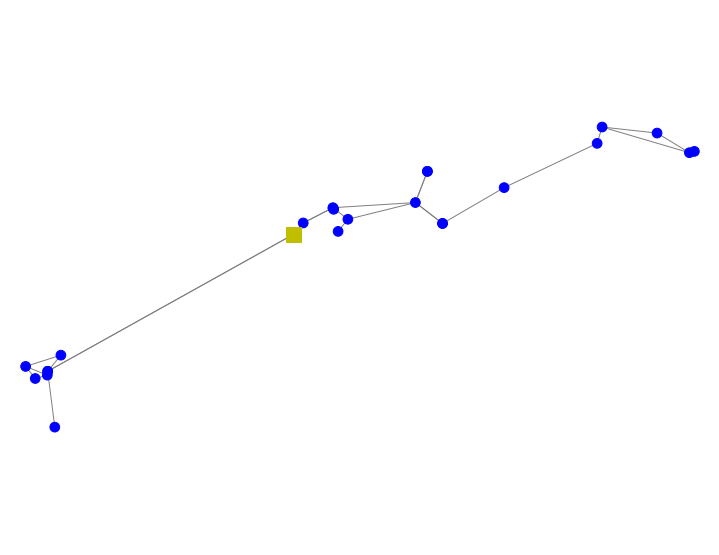

<AxesSubplot:>

In [10]:
#Run Powerflow

#test_line = 13 #Optional n-1 analysis for single line
#net.line.loc[test_line , "in_service"] = False #Optional n-1 analysis - Remove line from service
pp.runpp(net, algorithm='gs'); #Run power flow using gauss-siedel algorithm
#net.line.loc[test_line , "in_service"] = True #Optional n-1 analysis - Return line to service

pplot.simple_plot(net) #plot network

In [11]:
net.res_line #Powerflow line results

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,-1.780954e+00,-8.469007e-01,1.782917e+00,0.742068,1.963654e-03,-0.104832,1.786864e-02,0.017467,0.017869,0.965440,-2.596899,0.967163,-2.509264,5.105324
1,1.780954e+00,8.469007e-01,-1.779755e+00,-0.908289,1.198981e-03,-0.061388,1.786864e-02,0.018125,0.018125,0.965440,-2.596899,0.964373,-2.647092,5.178520
2,3.850995e+00,1.749866e+00,-3.844167e+00,-1.815500,6.828206e-03,-0.065634,3.825846e-02,0.038563,0.038563,0.967163,-2.509264,0.964373,-2.647092,11.018068
3,-1.067860e+01,-4.935188e+00,1.078142e+01,4.991206,1.028178e-01,0.056018,1.064010e-01,0.105795,0.106401,0.967163,-2.509264,0.982366,-1.764340,30.400282
4,-1.200878e+01,-5.585646e+00,1.209517e+01,5.655063,8.638502e-02,0.069417,1.179368e-01,0.117515,0.117937,0.982366,-1.764340,0.993908,-1.209977,33.696235
5,4.623658e+00,-6.957034e-01,-4.610454e+00,-17.232945,1.320427e-02,-17.928648,4.115252e-02,0.158166,0.158166,0.993908,-1.209977,0.986627,-1.352575,21.967521
6,1.925174e+01,-7.630165e+01,-1.915061e+01,-82.146284,1.011314e-01,-158.447930,3.426888e-01,0.370269,0.370269,1.004387,-0.250207,0.996387,-1.094493,56.101354
7,1.925174e+01,-7.630165e+01,-1.915061e+01,-82.146284,1.011314e-01,-158.447930,3.426888e-01,0.370269,0.370269,1.004387,-0.250207,0.996387,-1.094493,56.101354
8,1.762633e+02,5.897294e+01,-1.758064e+02,-58.351586,4.568809e-01,0.621351,4.877744e-01,0.488336,0.488336,1.000000,0.000000,0.995466,-0.335091,45.638837
9,7.215680e+01,2.158827e+01,-7.195283e+01,-22.800170,2.039655e-01,-1.211896,1.985562e-01,0.199949,0.199949,0.995466,-0.335091,0.990655,-0.709678,18.686841


In [12]:
net.res_bus #Powerflow bus results

,vm_pu,va_degree,p_mw,q_mvar
0,0.965440,-2.596899,-0.000000,-0.000000
1,0.967163,-2.509264,5.044686,2.443253
2,0.964373,-2.647092,5.623922,2.723790
3,0.982366,-1.764340,1.227365,0.594440
4,0.993908,-1.209977,19.043094,9.222992
5,0.996387,-1.094493,0.000000,150.000000
6,0.986627,-1.352575,4.610454,17.232945
7,1.000000,0.000000,-217.757579,88.450115
8,1.004387,-0.250207,0.000000,0.000000
9,0.978819,-2.171740,0.000000,0.000000


In [13]:
#Export results

#Comine bus and bus results dataframes to display names and inputs alongside outputs
df_bus = pd.concat([net.bus , net.res_bus], axis=1, sort=False)
df_bus.to_csv('results_bus_pk{}_pf{}.csv'.format(peak,PF))

#Comine line and line results dataframes to display names and inputs alongside outputs
df_line = pd.concat([net.line , net.res_line], axis=1, sort=False)
df_line.to_csv('results_line_pk{}_pf{}.csv'.format(peak,PF))

#Full Powerflow results
pp.to_excel(net, 'pp_res_pk{}_pf{}.xlsx'.format(peak,PF))

In [ ]:
#Print key results

#maximum line loading
line_max_pct = net.res_line["loading_percent"].max()
print("Maximum Line Load Percentage is {}% for {}".format(round(line_max_pct,1),df_line.loc[df_line['loading_percent'] == line_max_pct, 'name'].item()))

#maximum bus volt drop
max_vd = net.res_bus["vm_pu"].min()
print("Maximum volt drop is at {} receiving {}% of rated voltage".format(df_bus.loc[df_bus['vm_pu'] == max_vd, 'name'].item(), round(max_vd*100,1)))